Лабораторную выполнил Красников Андрей РФЗ-2

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set()
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Разведочный анализ будет проводиться на основе набора данных Национального опроса о здоровом старении

In [36]:
#№df = pd.read_csv('/content/drive/MyDrive/LabAI/Лаба 1/cirrhosis.csv')
df = pd.read_csv('cirrhosis.csv')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


**Выводим статистическую информацию о наборе данных**

In [37]:
print("\nОбщая информация:")
df.info()
print("=" * 80)
print("\nПроверка на пропуски:")
df.isnull().sum()


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    floa

,0
ID,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0


In [38]:
print("\nОписательная статистика для числовых признаков:")
df.describe()


Описательная статистика для числовых признаков:


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


**Выводим названия столбцов и строк**

In [39]:
print("\nНазвания столбцов:")
print(list(df.columns))


Названия столбцов:
['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


**Замена категориальных данных количественными**

In [40]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Категориальные столбцы: {cat_cols}")


Категориальные столбцы: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


Приведенные столбцы имеют категориальные данные, следовательно нам нужно их перевести в количественные, путем кодирования

In [46]:
cat_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly',
                    'Spiders', 'Edema']
df_encoded = df.copy()
label_encoders = {}
for col in cat_cols:
    if col in df.columns:
        le = LabelEncoder()
        df_encoded[col] = df_encoded[col].fillna('Unknown')
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

In [47]:
df_encoded

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,21464,0,2,2,2,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,20617,0,0,2,2,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,19994,0,0,2,2,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,0,0,2,2,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,2,2,24472,0,1,1,1,0,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,0,2,14245,0,1,1,1,0,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,0,2,20819,0,1,1,1,0,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,0,2,21185,0,1,1,1,0,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


**Визуализация данных**

Визуализация признака "Возраст"

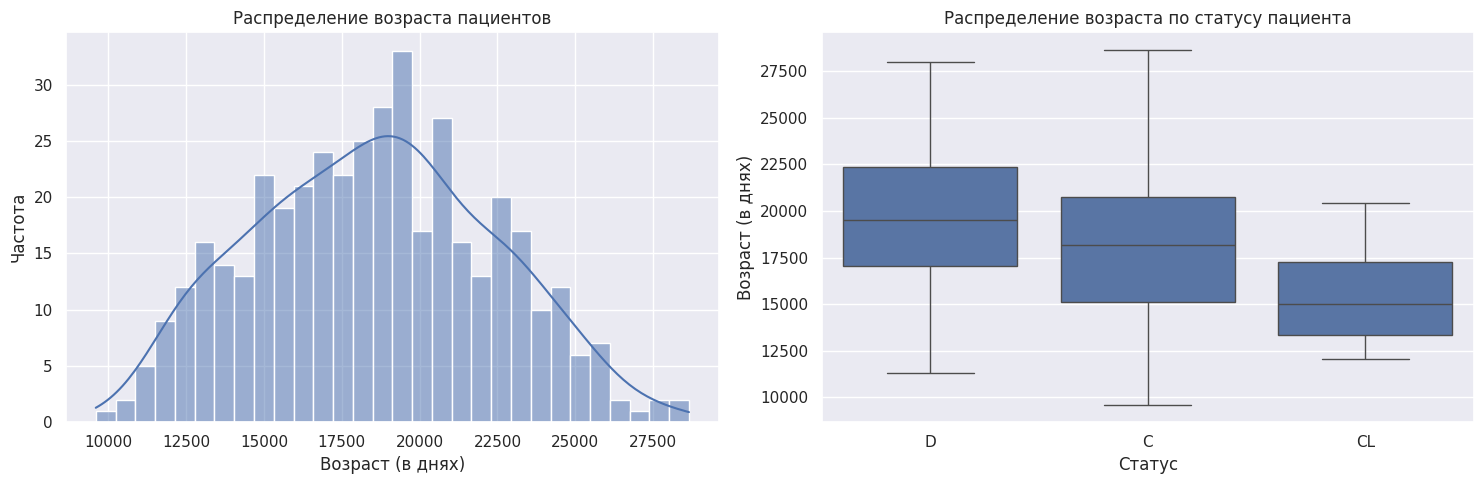

In [48]:
# 1.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Распределение возраста пациентов')
plt.xlabel('Возраст (в днях)')
plt.ylabel('Частота')

# 2.
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Status', y='Age')
plt.title('Распределение возраста по статусу пациента')
plt.xlabel('Статус')
plt.ylabel('Возраст (в днях)')
plt.tight_layout()
plt.show()

Визуализация признака "Билирубин"

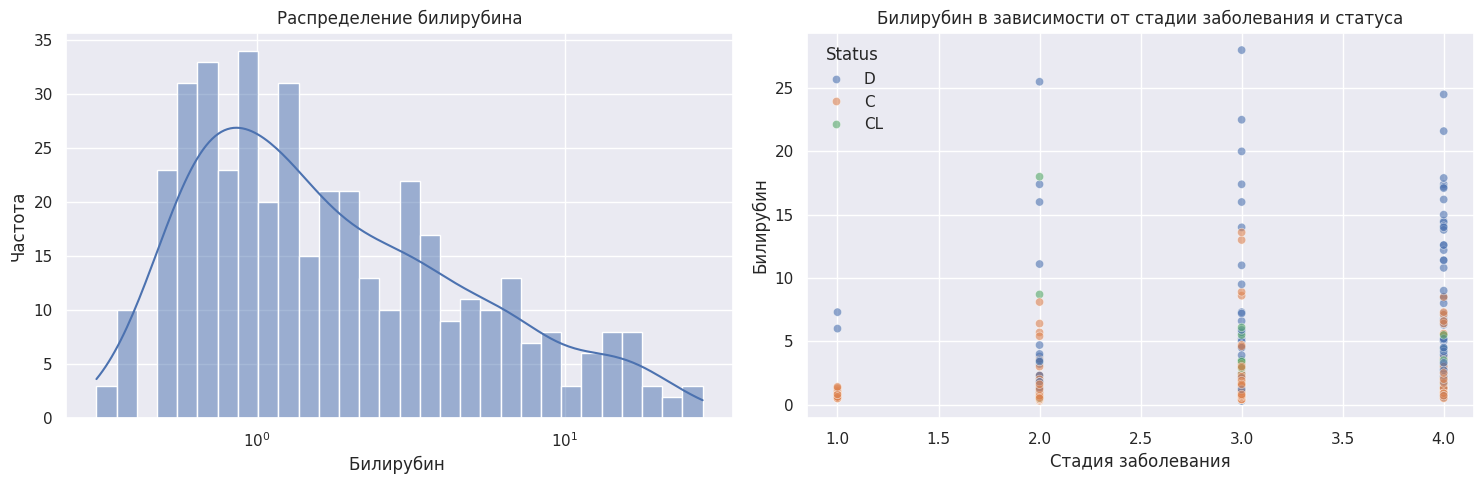

In [51]:
# 1.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Bilirubin', bins=30, kde=True, log_scale=True)
plt.title('Распределение билирубина')
plt.xlabel('Билирубин ')
plt.ylabel('Частота')

# 2.
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Stage', y='Bilirubin', hue='Status', alpha=0.6)
plt.title('Билирубин в зависимости от стадии заболевания и статуса')
plt.xlabel('Стадия заболевания')
plt.ylabel('Билирубин')
plt.tight_layout()
plt.show()

Визуализация признака "Альбумин"

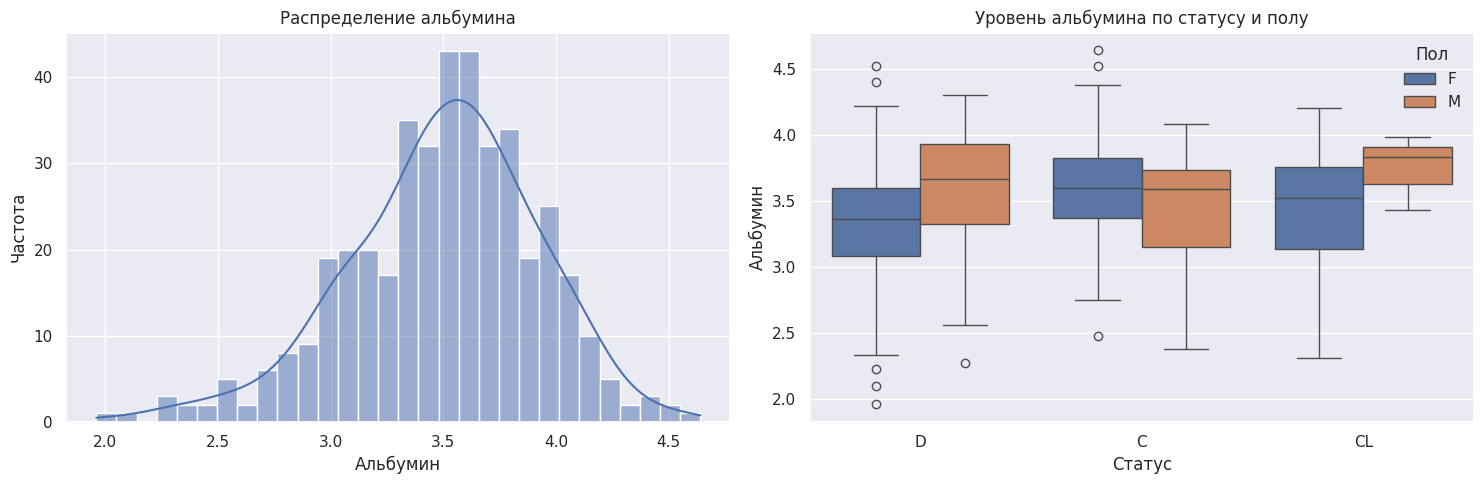

In [52]:
# 1.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Albumin', bins=30, kde=True)
plt.title('Распределение альбумина')
plt.xlabel('Альбумин')
plt.ylabel('Частота')

# 2.
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Status', y='Albumin', hue='Sex')
plt.title('Уровень альбумина по статусу и полу')
plt.xlabel('Статус')
plt.ylabel('Альбумин')
plt.legend(title='Пол')
plt.tight_layout()
plt.show()

Визуализация признака "Стадия"

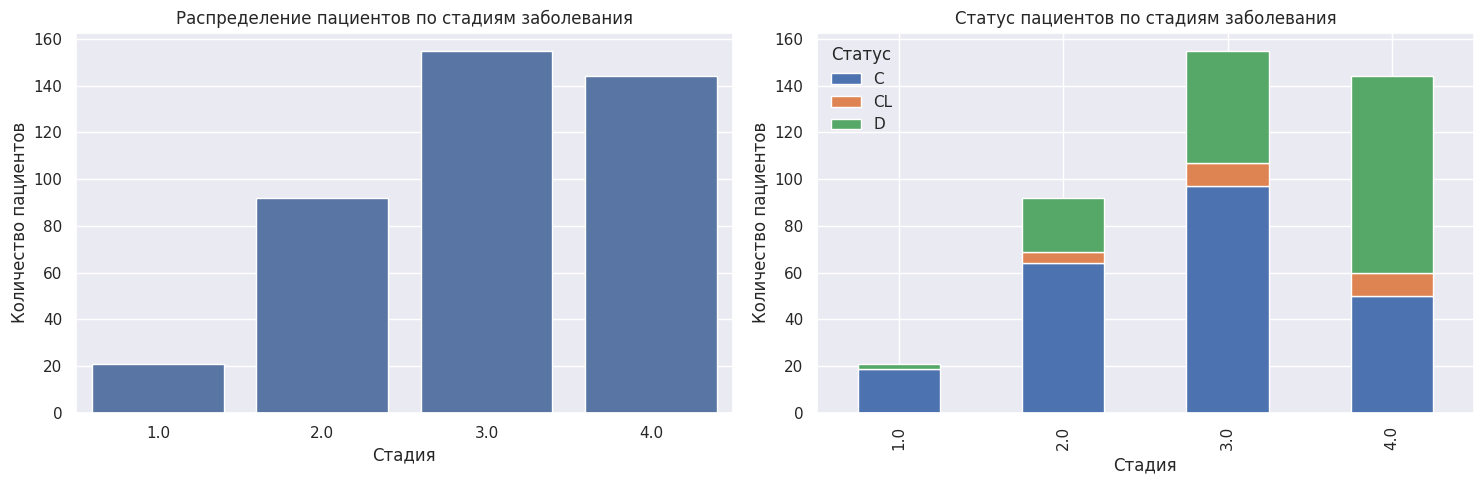

In [53]:
# 1.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
stage_counts = df['Stage'].value_counts().sort_index()
sns.barplot(x=stage_counts.index, y=stage_counts.values)
plt.title('Распределение пациентов по стадиям заболевания')
plt.xlabel('Стадия')
plt.ylabel('Количество пациентов')

# 2.
plt.subplot(1, 2, 2)
cross_tab = pd.crosstab(df['Stage'], df['Status'])
cross_tab.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Статус пациентов по стадиям заболевания')
plt.xlabel('Стадия')
plt.ylabel('Количество пациентов')
plt.legend(title='Статус')
plt.tight_layout()
plt.show()

Визуализация признака "Лекарственный препарат"

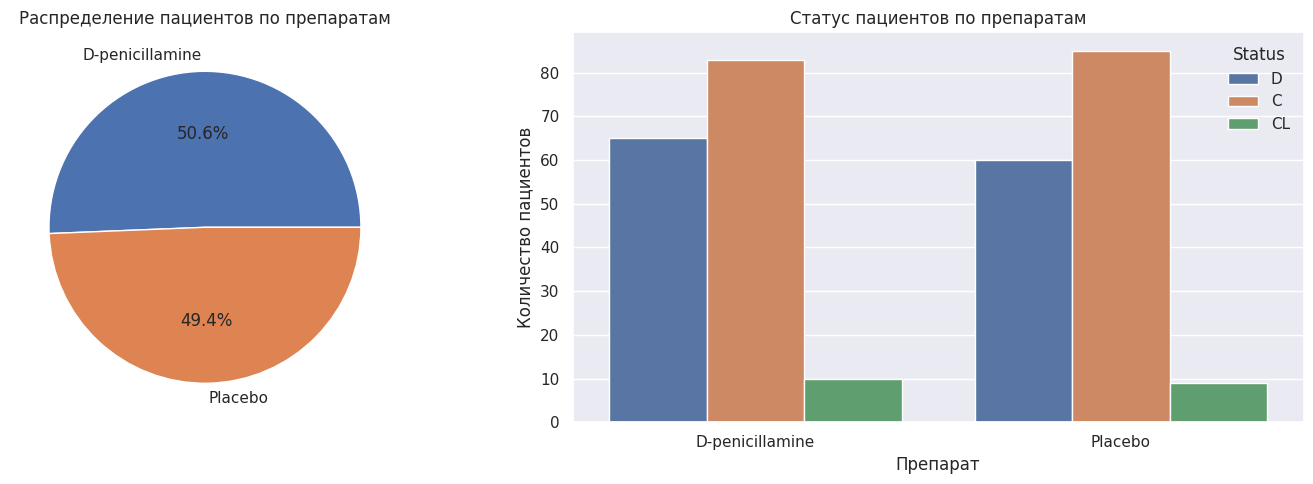

In [54]:
# 1. Круговая диаграмма распределения препаратов
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
drug_counts = df['Drug'].value_counts()
plt.pie(drug_counts.values, labels=drug_counts.index, autopct='%1.1f%%')
plt.title('Распределение пациентов по препаратам')

# 2. Выживаемость по препаратам
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Drug', hue='Status')
plt.title('Статус пациентов по препаратам')
plt.xlabel('Препарат')
plt.ylabel('Количество пациентов')
plt.tight_layout()
plt.show()

**Групповые визуализации**

1. Корреляционная матрица

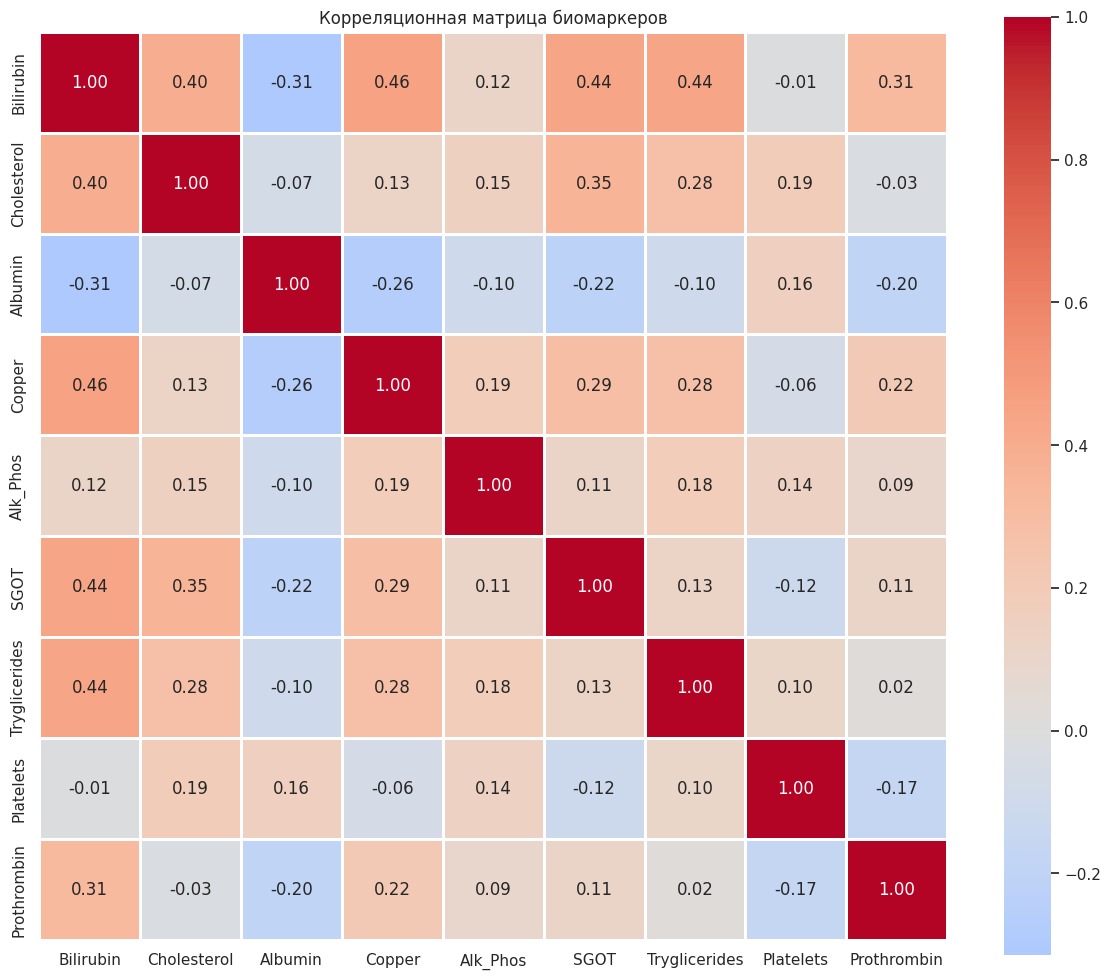

In [55]:
numeric_cols = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', linewidths=1)
plt.title('Корреляционная матрица биомаркеров')
plt.tight_layout()
plt.show()

2. Pairplot для основных признаков

<Figure size 1500x1000 with 0 Axes>

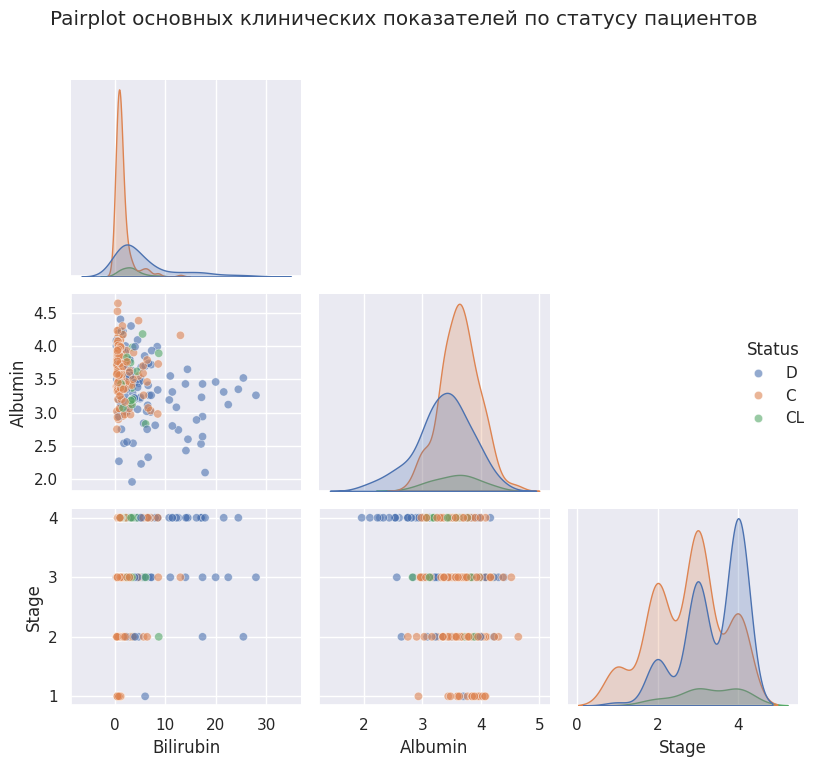

In [56]:
selected_cols = ['Bilirubin', 'Albumin', 'Stage', 'Status', 'Drug']
subset_df = df[selected_cols].dropna()

plt.figure(figsize=(15, 10))
sns.pairplot(data=subset_df, hue='Status', diag_kind='kde',
             plot_kws={'alpha': 0.6}, corner=True)
plt.suptitle('Pairplot основных клинических показателей по статусу пациентов', y=1.02)
plt.tight_layout()
plt.show()


3. Взаимосвязь билирубина и альбумина

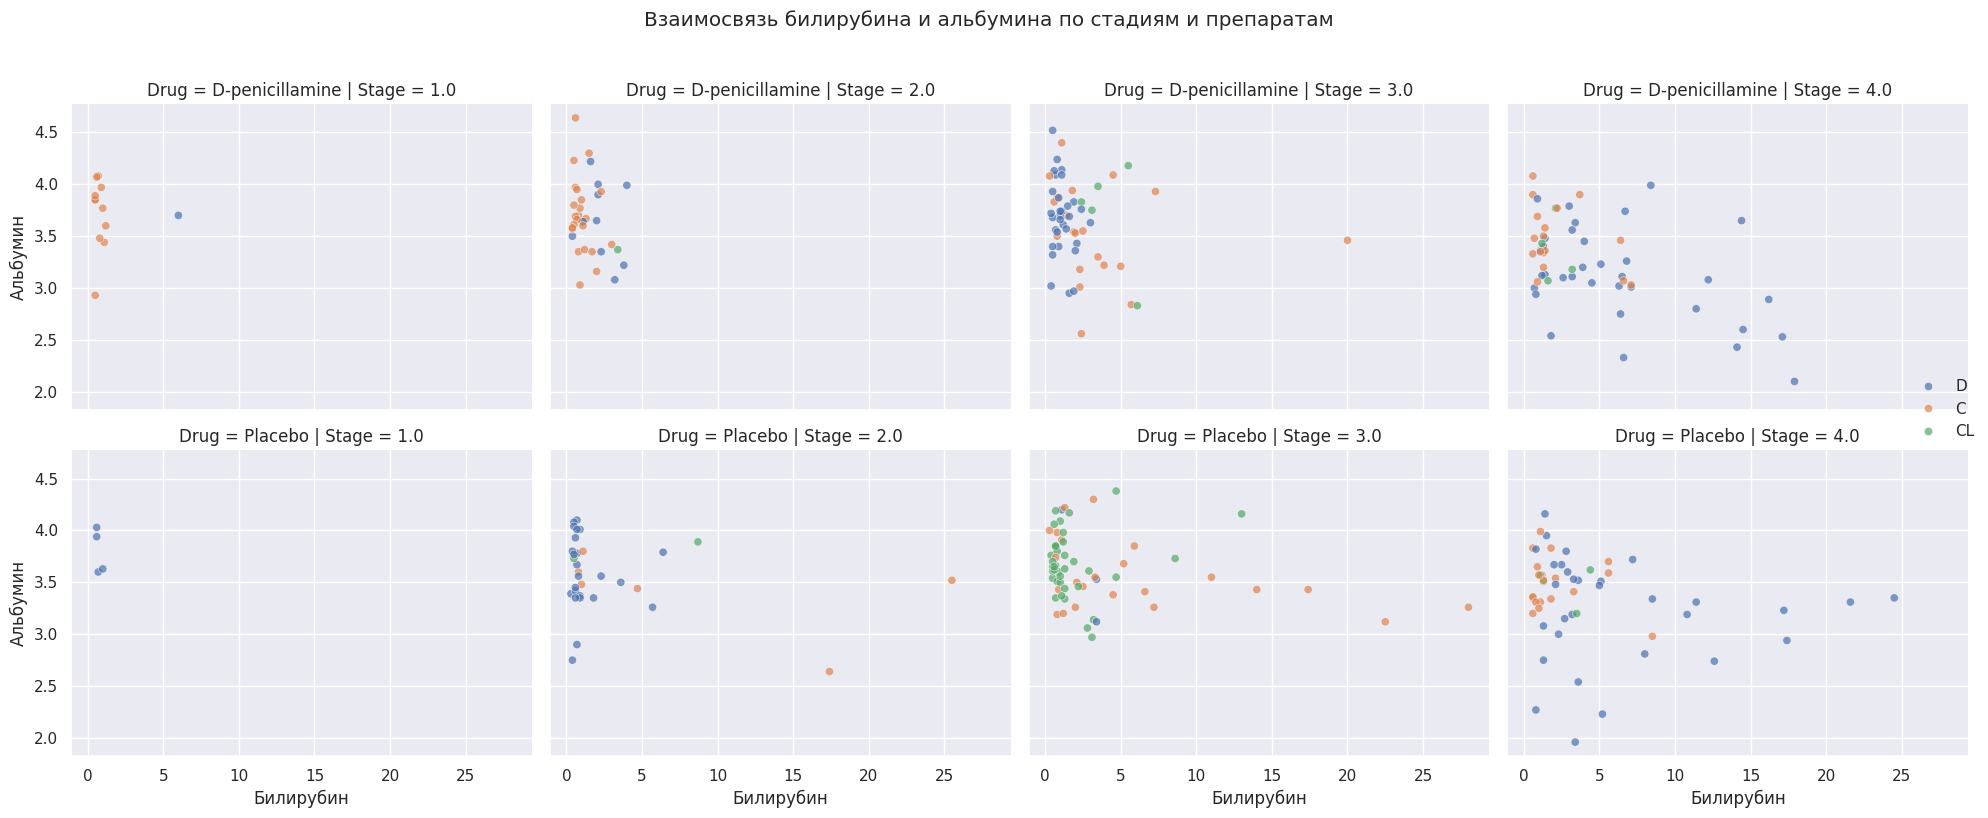

In [57]:
g = sns.FacetGrid(df, col='Stage', row='Drug', height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='Bilirubin', y='Albumin',
                hue='Status', alpha=0.7)
g.add_legend()
g.set_axis_labels("Билирубин", "Альбумин")
plt.suptitle('Взаимосвязь билирубина и альбумина по стадиям и препаратам', y=1.02)
plt.tight_layout()
plt.show()